<a href="https://colab.research.google.com/github/ardilalukita14/PCVK-Genap-21-22/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODUL 5 – Operasi Aritmatika dan Logika - Gamma Correction, Image Depth, PSNR, Average Denoising, Image Masking**

## **TUGAS PRAKTIKUM**

**1. Buat Gamma Correction sesuai dengan petunjuk berikut**

Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.

 **gamma correction** adalah suatu parameter yang hampir mirip dengan kontrol kontras dan britnes. 

    Jika level kontras dan britnes dirubah, maka akan mempengaruhi semua level gambar mulai dari level paling rendah (gelap) hingga level paling tinggi (putih). 
    Sedang kalau level gamma dirubah, maka gamma hanya akan mempengaruhi level menengah antara gelap dan putih saja (atau hanya level abu2)

Singkatnya :

 **gamma correction** : ukuran tingkat pencahayaan dari warna paling terang ke paling gelap pada layar.


### **Jawab**

In [2]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import glob as glob
import math

### **RUMUS 1**

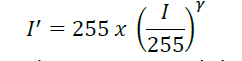

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


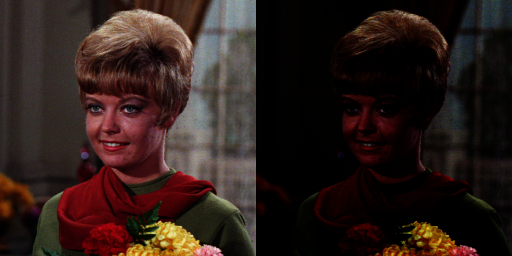

In [4]:
# Membuat inputan untuk memasukan nilai oleh pengguna

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: ')) # nilai yang diinputkan bertipe integer
except ValueError:
  print('Error, not a number') # pesan error ketika user salah menginputkan nilai Gamma

# Membaca File Image
imageOri = cv.imread('/content/drive/MyDrive/Images/female.tiff')
image_gamma = np.zeros(imageOri.shape, imageOri.dtype)

# Mengakses setiap pixel
for y in range(imageOri.shape[0]):
  for x in range(imageOri.shape[1]):
    for c in range(imageOri.shape[2]):
      image_gamma[y,x,c] = np.clip(255 * pow(imageOri[y,x,c]/255, (gamma)), 0, 255) # pow, fungsi yang digunakan untuk menghitung nilai pangkat

# Menampilkan gambar original dengan gambar hasil gamma correction
image_output = cv.hconcat((imageOri,  image_gamma))
cv2_imshow(image_output)

### **RUMUS 2**

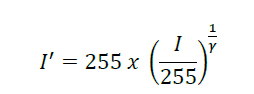

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


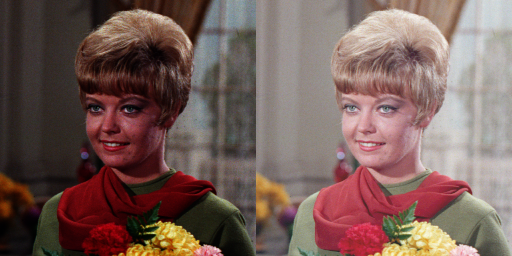

In [5]:
# Membuat inputan untuk memasukan nilai oleh pengguna

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: ')) # nilai yang diinputkan bertipe integer
except ValueError:
  print('Error, not a number') # pesan error ketika user salah menginputkan nilai Gamma

# Membaca File Image
imageOri = cv.imread('/content/drive/MyDrive/Images/female.tiff')
image_gamma = np.zeros(imageOri.shape, imageOri.dtype)

# Mengakses setiap pixel
for y in range(imageOri.shape[0]):
  for x in range(imageOri.shape[1]):
    for c in range(imageOri.shape[2]):
      image_gamma[y,x,c] = np.clip(255 * pow(imageOri[y,x,c]/255, (1/gamma)), 0, 255) # pow, fungsi yang digunakan untuk menghitung nilai pangkat

# Menampilkan gambar original dengan gambar hasil gamma correction
image_output = cv.hconcat((imageOri,  image_gamma))
cv2_imshow(image_output)

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 0.3


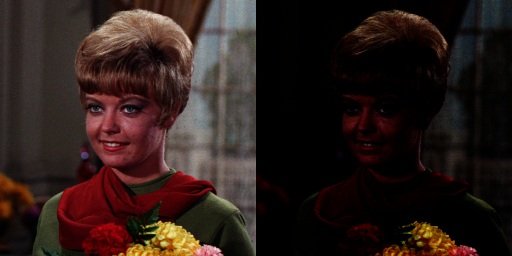

In [6]:
# Membuat inputan untuk memasukan nilai oleh pengguna

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = float(input('Masukkan nilai Gamma: ')) # nilai yang diinputkan bertipe integer
except ValueError:
  print('Error, not a number') # pesan error ketika user salah menginputkan nilai Gamma

# Membaca File Image
imageOri = cv.imread('/content/drive/MyDrive/Images/female.tiff')
image_gamma = np.zeros(imageOri.shape, imageOri.dtype)

# Mengakses setiap pixel
for y in range(imageOri.shape[0]):
  for x in range(imageOri.shape[1]):
    for c in range(imageOri.shape[2]):
      image_gamma[y,x,c] = np.clip(255 * pow(imageOri[y,x,c]/255, (1/gamma)), 0, 255) # pow, fungsi yang digunakan untuk menghitung nilai pangkat

# Menampilkan gambar original dengan gambar hasil gamma correction
image_output = cv.hconcat((imageOri,  image_gamma))
cv2_imshow(image_output)


**KESIMPULAN :**

Terlihat gambar semakin terang dibanding dengan gambar originalnya, ini membuktikan bahwa semakin besar / tinggi nilai gamma correction yang diterapkan pada citra, maka semakin terang citra tersebut, begitupun sebaliknya, jika semakin kecil / rendah nilai gamma correction yang diterapkan pada citra, maka semakin gelap citra tersebut.

**2. Buat Simulasi Image Depth**

Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000 0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst. Karena Visual Studio 2017 bekerja hanya pada 8 bit, maka percobaan ini hanya memanipulasi warna sehingga jumlah warnanya sesuai dengan kedalamannya. Untuk kasus 7-bit, maka dua warna 8-bit diwakili oleh satu warna 7-bit. Contoh pixel warna 0 dan 1 pada 8-bit, diwakili oleh warna 0 pada 7-bit. pixel warna 2 dan 3 pada 8-bit, diwakili oleh warna 1 pada 7-bit, dst.

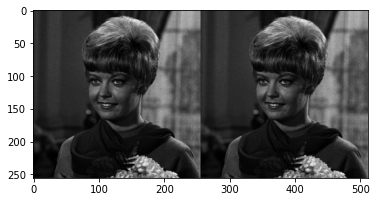

In [8]:
bit_depth = 8 # Mendefinisikan bit depth
level = 255 / (pow(2, bit_depth)-1) # membagi jumlah warna dengan nilai pixel

# Membaca file image
OriginalImg = cv.imread('/content/drive/MyDrive/Images/female.tiff', cv.IMREAD_GRAYSCALE)
image_depth = np.zeros(OriginalImg.shape, OriginalImg.dtype)

# Mengakses setiap pixel
for y in range(OriginalImg.shape[0]):
  for x in range(OriginalImg.shape[1]):
      image_depth[y,x] = np.clip(round(OriginalImg[y,x]/level) * level, 0, 255) # pow, fungsi yang digunakan untuk menghitung nilai pangkat

# Menampilkan gambar original dengan gambar hasil gamma correction
img_output = cv.hconcat((OriginalImg,  image_depth))

# Menampilkan image dengan library matplotlib, agar bisa melihat detail koordinat x dan y
plt.imshow(img_output, cmap='gray') # cmap = convert image ke grayscale




**KESIMPULAN :**

Disini terlihat ketika bith dept diatur sebesar 8, maka akan memiliki warna sebanyak 256, dari warna yang banyak ini bisa kita lihat bahwa citra yang ditampilkan semakin detail / jelas. Oleh sebab itu, dapat disimpulkan bahwasanya **image yang memiliki warna lebih banyak pasti memiliki gambar / citra yang detail**

**3. Buat modul Average Denoising**

Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder , gunakan modul glob (import glob).

**a. Jumlah Citra di Average = 5**

 Diperoleh nilai PSNR sebesar :  19.533479726491706 dB 
----------------------------------------------------


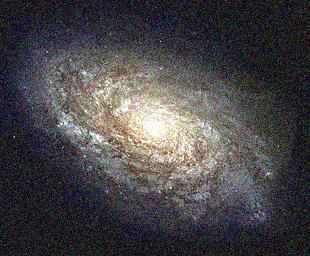

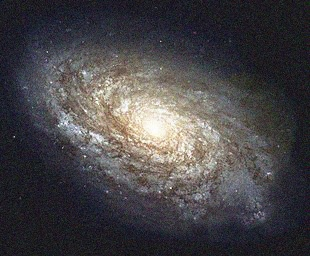

In [16]:
# Fungsi dari PSNR
def PSNR(image1, image2):
  mse = np.mean((image1 - image2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr

# Membaca file image / citra asli
original_image = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')

# Membaca semua image dalam satu folder menggunakan modul glob
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

# Average denoising
image_denoising = np.zeros(cv_img[0].shape)
jml_citra = 5
for a in range(jml_citra):
  image_denoising = image_denoising + cv_img[a]
image_denoising = np.uint16(image_denoising / jml_citra) # pendefinisian tipe data citra sebesar 16 bit (bertipe Unsigned integer)

psnr = PSNR(original_image, image_denoising)

print(' Diperoleh nilai PSNR sebesar : ', psnr, 'dB ')
print('----------------------------------------------------')

# Menampilkan hasil pengolahan citra dengan average denoising

cv2_imshow(cv_img[0])
cv2_imshow(image_denoising)


**b. Jumlah Citra di Average = 30**

 Diperoleh nilai PSNR sebesar :  19.869746330586114 dB 
----------------------------------------------------


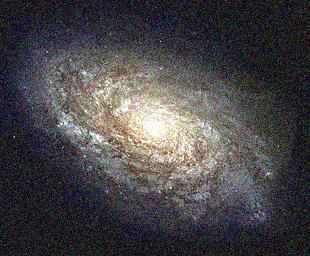

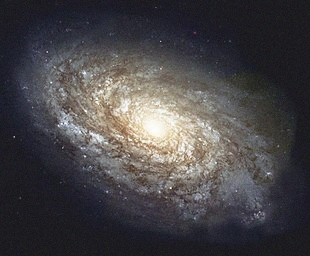

In [17]:
# Fungsi dari PSNR
def PSNR(image1, image2):
  mse = np.mean((image1 - image2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr

# Membaca file image / citra asli
original_image = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')

# Membaca semua image dalam satu folder menggunakan modul glob
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

# Average denoising
image_denoising = np.zeros(cv_img[0].shape)
jml_citra = 30
for a in range(jml_citra):
  image_denoising = image_denoising + cv_img[a]
image_denoising = np.uint16(image_denoising / jml_citra) # pendefinisian tipe data citra sebesar 16 bit (bertipe Unsigned integer)

psnr = PSNR(original_image, image_denoising)

print(' Diperoleh nilai PSNR sebesar : ', psnr, 'dB ')
print('----------------------------------------------------')

# Menampilkan hasil pengolahan citra dengan average denoising

cv2_imshow(cv_img[0])
cv2_imshow(image_denoising)

**c. Jumlah Citra di Average = 60**

 Diperoleh nilai PSNR sebesar :  19.907078046665237 dB 
----------------------------------------------------


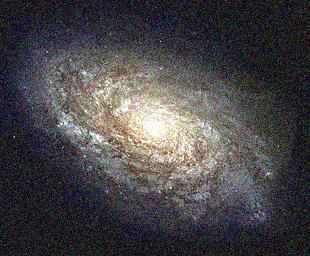

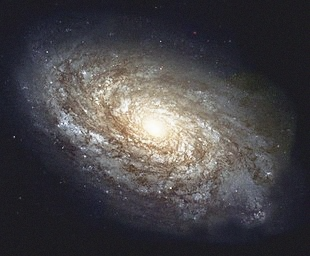

In [18]:
# Fungsi dari PSNR
def PSNR(image1, image2):
  mse = np.mean((image1 - image2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr

# Membaca file image / citra asli
original_image = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')

# Membaca semua image dalam satu folder menggunakan modul glob
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

# Average denoising
image_denoising = np.zeros(cv_img[0].shape)
jml_citra = 60
for a in range(jml_citra):
  image_denoising = image_denoising + cv_img[a]
image_denoising = np.uint16(image_denoising / jml_citra) # pendefinisian tipe data citra sebesar 16 bit (bertipe Unsigned integer)

psnr = PSNR(original_image, image_denoising)

print(' Diperoleh nilai PSNR sebesar : ', psnr, 'dB ')
print('----------------------------------------------------')

# Menampilkan hasil pengolahan citra dengan average denoising

cv2_imshow(cv_img[0])
cv2_imshow(image_denoising)

**d. Jumlah Citra di Average = 80**

 Diperoleh nilai PSNR sebesar :  19.916855149579693 dB 
----------------------------------------------------


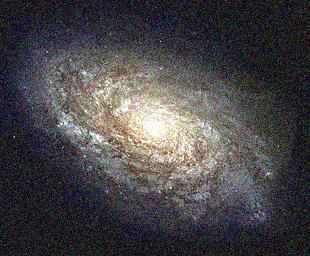

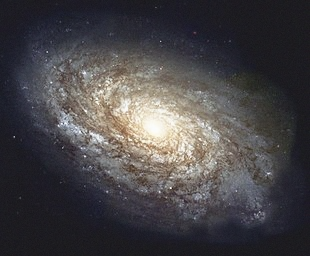

In [19]:
# Fungsi dari PSNR
def PSNR(image1, image2):
  mse = np.mean((image1 - image2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr

# Membaca file image / citra asli
original_image = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')

# Membaca semua image dalam satu folder menggunakan modul glob
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

# Average denoising
image_denoising = np.zeros(cv_img[0].shape)
jml_citra = 80
for a in range(jml_citra):
  image_denoising = image_denoising + cv_img[a]
image_denoising = np.uint16(image_denoising / jml_citra) # pendefinisian tipe data citra sebesar 16 bit (bertipe Unsigned integer)

psnr = PSNR(original_image, image_denoising)

print(' Diperoleh nilai PSNR sebesar : ', psnr, 'dB ')
print('----------------------------------------------------')

# Menampilkan hasil pengolahan citra dengan average denoising

cv2_imshow(cv_img[0])
cv2_imshow(image_denoising)

**e. Jumlah Citra di Average = 100**

 Diperoleh nilai PSNR sebesar :  19.92196095594035 dB 
----------------------------------------------------


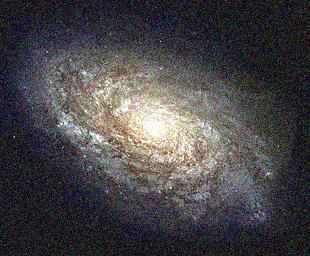

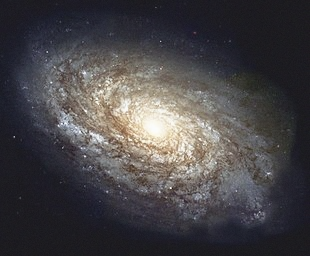

In [20]:
# Fungsi dari PSNR
def PSNR(image1, image2):
  mse = np.mean((image1 - image2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr

# Membaca file image / citra asli
original_image = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')

# Membaca semua image dalam satu folder menggunakan modul glob
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

# Average denoising
image_denoising = np.zeros(cv_img[0].shape)
jml_citra = 100
for a in range(jml_citra):
  image_denoising = image_denoising + cv_img[a]
image_denoising = np.uint16(image_denoising / jml_citra) # pendefinisian tipe data citra sebesar 16 bit (bertipe Unsigned integer)

psnr = PSNR(original_image, image_denoising)

print(' Diperoleh nilai PSNR sebesar : ', psnr, 'dB ')
print('----------------------------------------------------')

# Menampilkan hasil pengolahan citra dengan average denoising

cv2_imshow(cv_img[0])
cv2_imshow(image_denoising)

**KESIMPULAN :**

Berdasarkan percobaan yang telah dilakukan diatas, dapat disimpulkan bahwasanya ketika semakin banyak jumlah citra yang dirata-rata, maka denoise yang dihasilkan akan semakin baik, begitupun nilai PSNR juga semakin. Dengan begitu, dapat disimpulkan kembali, bahwa semakin tinggi nilai PSNR, makin semakin baik pula kualitas citra hasil denoise-nya.

**4. Image Masking**

Buat image masking untuk image berikut. Image kiri adalah image asli (images/teeth.jpg), sedangkan image kanan adalah hasilnya:

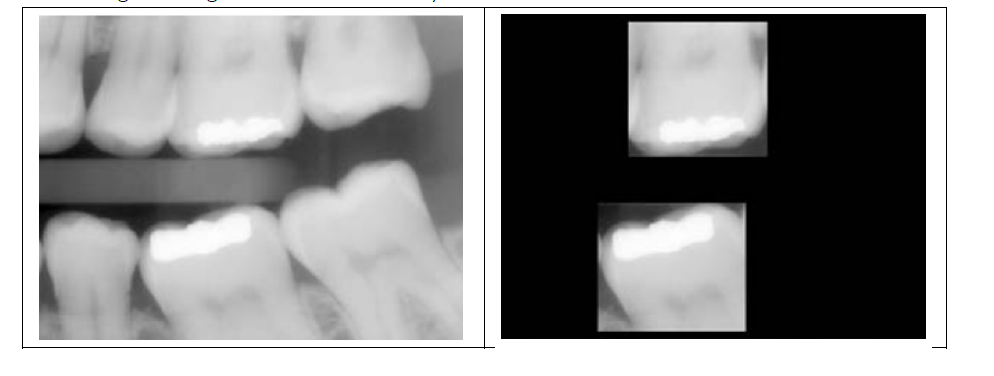

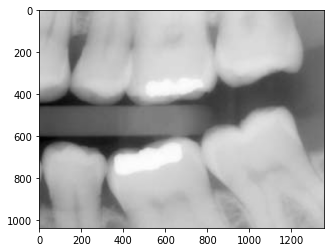

In [21]:
# Membaca file image / citra asli
image_original = cv.imread('/content/drive/MyDrive/Images/teeth.jpg')

# Menampilkan image dengan library matplotlib
plt.imshow(image_original)

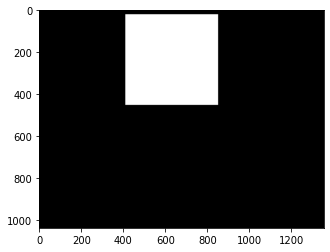

In [83]:
# Membaca file image / citra asli
original_image = cv.imread('/content/drive/MyDrive/Images/teeth.jpg')

original_image = np.zeros(original_image.shape, dtype=np.uint8)
mask = cv.rectangle(original_image, pt1=(850,20),  pt2=(410,450), color=(255,255,255), thickness=-1)

plt.imshow(original_image)

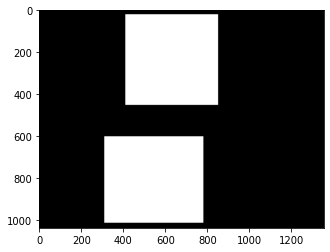

In [84]:
mask = cv.rectangle(original_image, pt1=(780,600),  pt2=(310,1010), color=(255,255,255), thickness=-1)
plt.imshow(original_image)

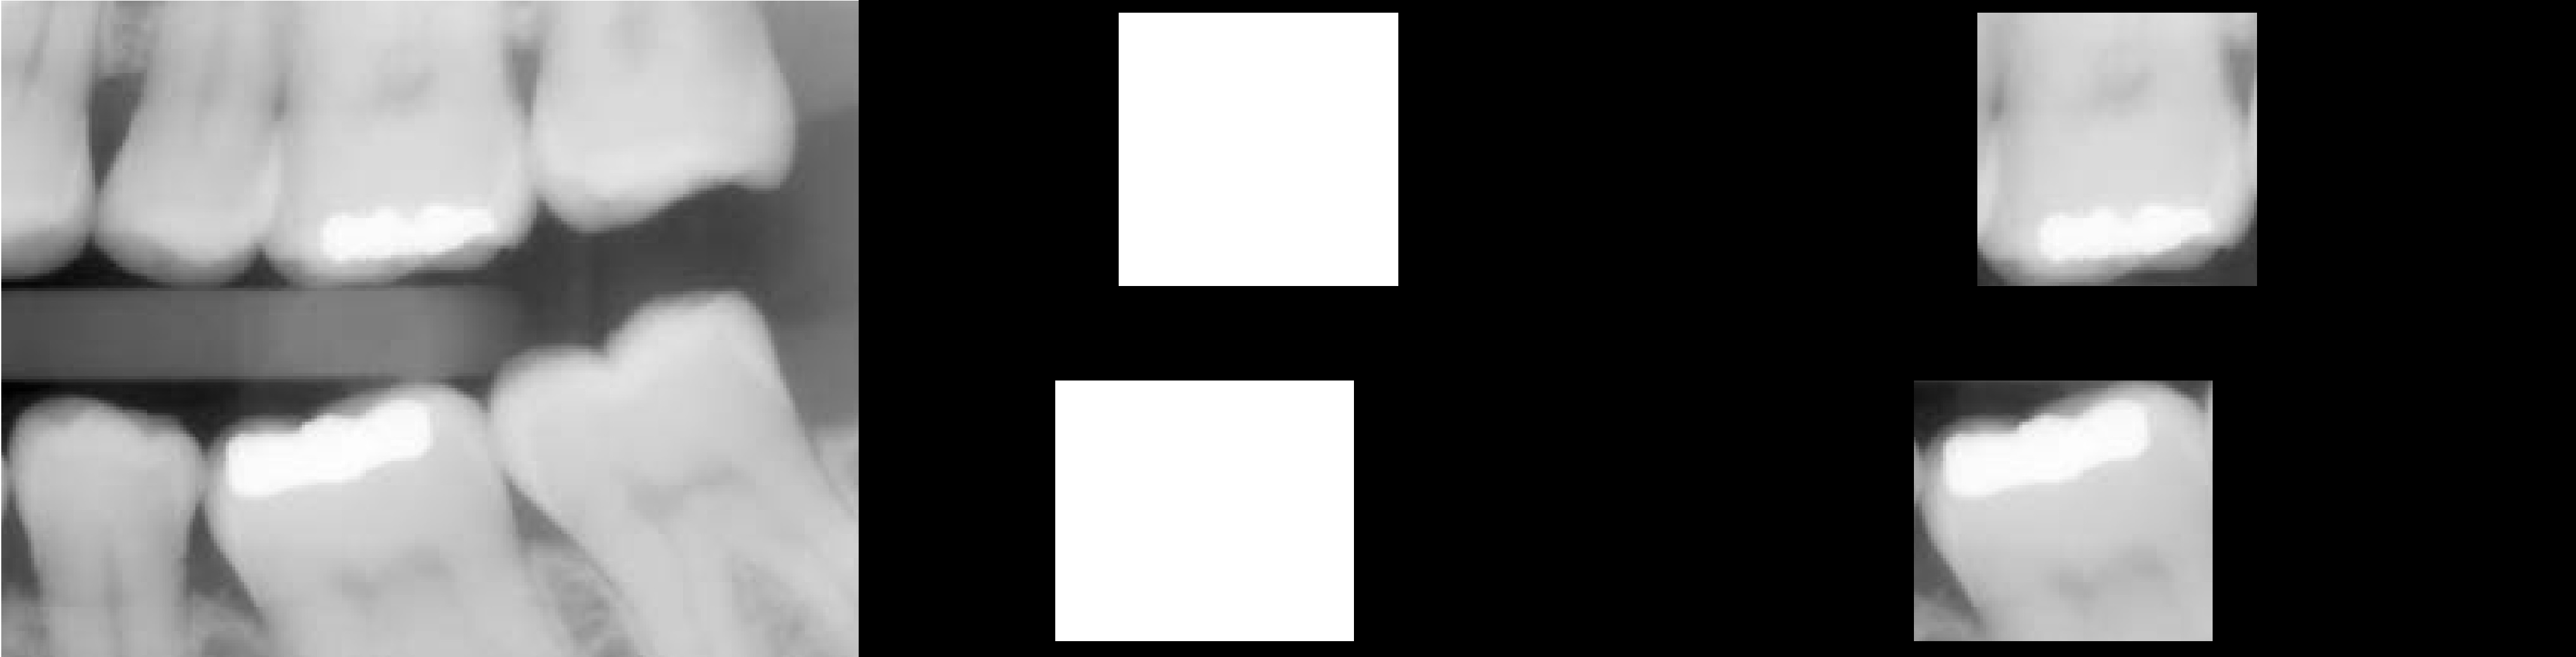

In [94]:
# Membaca file image / citra asli
original_image = cv.imread('/content/drive/MyDrive/Images/teeth.jpg')

# Melakukan operasi AND pada binary mask
result = cv.bitwise_and(original_image, mask)

# Mengatur background image dengan warna hitam
result[mask==0] = 0

hasil_citra = cv.hconcat((original_image, mask, result))
cv2_imshow(hasil_citra)